# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [4]:
df = pd.read_csv(r"data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()#無指定的話是前五筆

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [8]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [9]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

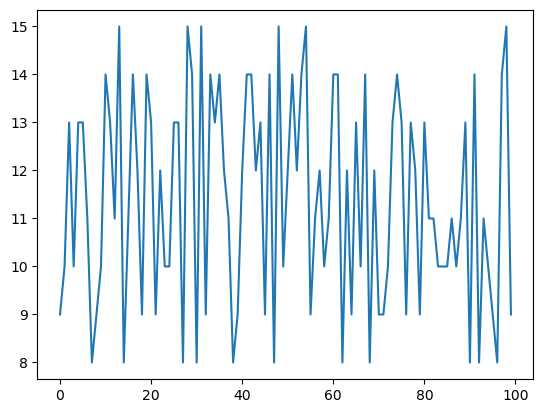

In [10]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

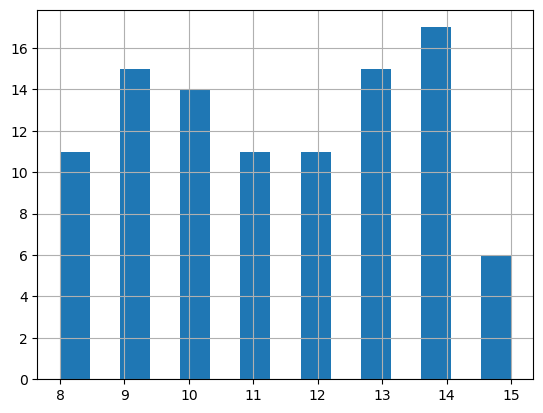

In [12]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [13]:
df.國文.mean()

11.39

算標準差。

In [15]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [17]:
df.describe()
#所有相關的東西全部算出來

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


只算兩科間的相關係數當然也可以。

In [18]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [21]:
df["總級分"] = df.sum(axis=1)
#[]禮表示添加元素
df

C:\Users\chih-yu\AppData\Local\Temp\ipykernel_7664\87794243.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總級分"] = df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

In [22]:
df["加權"] = df.國文+df.英文+df.數學*2

In [23]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [25]:
df.sort_values(by="總級分",ascending=False).head(10)
#sort_values = 以值大小排序
#by=哪一欄
#ascending=由小到大

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [29]:
df2=df.sort_values(by=["加權","總級分"],ascending=False)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,51,36
84,胡凱琳,10,8,9,9,15,51,36
32,林建亨,9,11,8,8,11,47,36
18,梁慧君,9,8,8,8,12,45,33


### 【重點】重設 index

In [32]:
df2.index=range(1,101)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [34]:
df2[df2.數學==15]


,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [40]:
df2[df2.數學&df2.英文 ==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [43]:
#刪除
df2=df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [46]:
#加回
df2["總級分"] = df2.sum(axis=1)
df2

C:\Users\chih-yu\AppData\Local\Temp\ipykernel_7664\3559048266.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2["總級分"] = df2.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,234
2,胡淳茜,12,15,14,13,11,55,240
3,詹威德,12,13,15,10,14,55,238
4,蔡亦瑄,13,13,14,13,12,54,238
5,李士賢,10,14,15,13,13,54,238
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36,174
97,胡凱琳,10,8,9,9,15,36,174
98,林建亨,9,11,8,8,11,36,166
99,梁慧君,9,8,8,8,12,33,156


In [47]:
df.drop("總級分", axis=1,inplace = True)
df
#inplace = True  不創建新對象，直接更改檔案覆寫
#inplace = False 創建新對象

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [61]:
df.drop(5)


,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [55]:
df2[df2.姓名=="蔡亦瑄"]

,姓名,國文,英文,數學,自然,社會,加權,總級分
4,蔡亦瑄,13,13,14,13,12,54,238


In [62]:
df2.drop(df2[df2.姓名=="蔡亦瑄"].index)

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,234
2,胡淳茜,12,15,14,13,11,55,240
3,詹威德,12,13,15,10,14,55,238
5,李士賢,10,14,15,13,13,54,238
6,童心怡,13,13,14,8,13,54,230
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36,174
97,胡凱琳,10,8,9,9,15,36,174
98,林建亨,9,11,8,8,11,36,166
99,梁慧君,9,8,8,8,12,33,156


In [63]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,234
2,胡淳茜,12,15,14,13,11,55,240
3,詹威德,12,13,15,10,14,55,238
4,蔡亦瑄,13,13,14,13,12,54,238
6,童心怡,13,13,14,8,13,54,230
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36,174
97,胡凱琳,10,8,9,9,15,36,174
98,林建亨,9,11,8,8,11,36,166
99,梁慧君,9,8,8,8,12,33,156


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [65]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')
#不能用了

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [66]:
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [67]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [70]:
df[-300:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

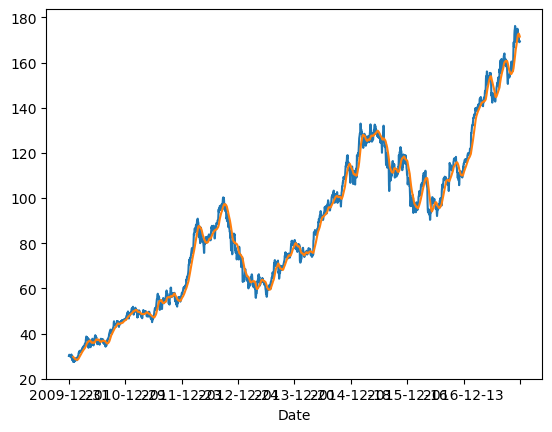

In [73]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

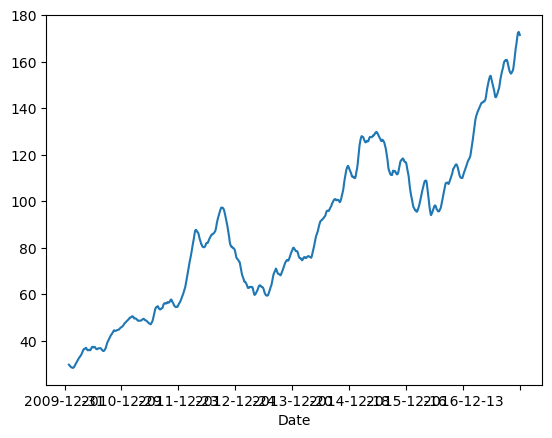

In [74]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

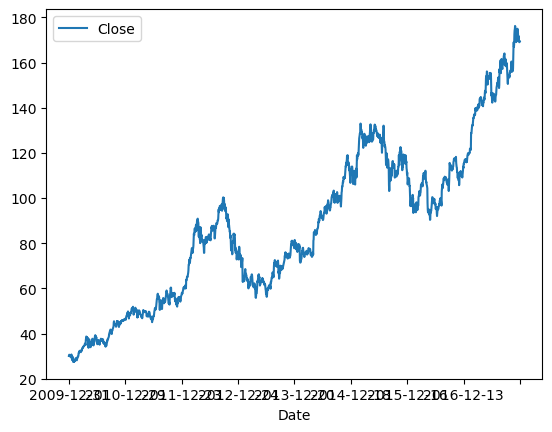

In [77]:
df.Close.plot(legend = True)

<AxesSubplot:xlabel='Date'>

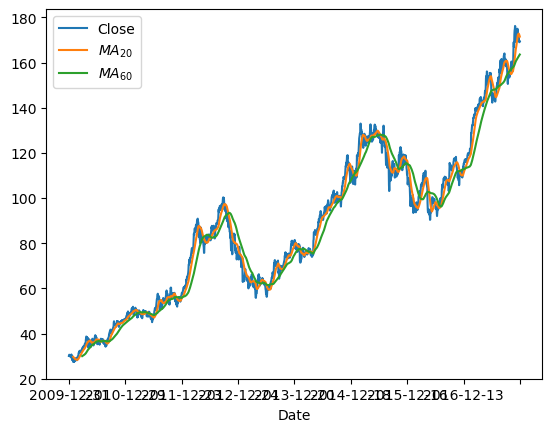

In [84]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
#label標籤
#Close是表格中的一欄啦

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [86]:
#x是y的前一位
#輸入前一筆資料可得y
#y永遠是x的下一筆資料
close = df.Close.values
len(close)
#values用在列出series
#len計算共幾筆?
#共有2000筆(0--1999)

2000

In [88]:
x = close[:-1]
x
#第0位道地-1位(不包含)(也就是倒數第二位)(0--1998)
len(x)

1999

In [90]:
y = close[1:]
y
#第1位置最後一位(不包含)(也就是倒數第一位)(1-1999)
len(y)

1999

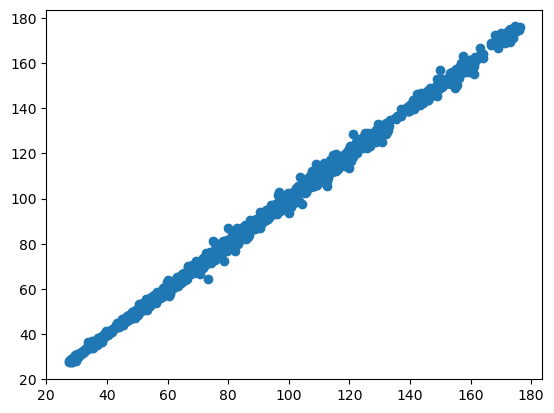

In [91]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mydata = np.random.randn(4,3)
#隨機生成4,3的矩陣

In [2]:
mydata

array([[ 0.48338434,  0.96730913, -0.21226273],
       [-0.91543745,  1.6657549 ,  1.28953756],
       [ 0.33307542, -0.5828563 , -1.02526258],
       [-0.23405041, -0.85826458, -2.13679303]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [3]:
df2 = pd.DataFrame(mydata)
df2

,0,1,2
0,0.483384,0.967309,-0.212263
1,-0.915437,1.665755,1.289538
2,0.333075,-0.582856,-1.025263
3,-0.234050,-0.858265,-2.136793


In [4]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))
#將column名稱改成abc

In [30]:
df2

,A,B,C
0,-0.822905,0.670776,1.530464
1,-0.152129,-0.181481,0.559341
2,0.001227,0.004614,0.573156
3,0.116876,-0.725315,-0.788373


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [6]:
#另一個dataframe    np.random.randn(3,3)
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [7]:
df3

,A,B,C
0,-0.256280,-2.612692,0.342686
1,-1.868365,0.043427,-0.615599
2,-0.498898,-0.993846,0.542188


In [8]:
#concat 接合
#concat(接合變數*2 , 軸)
df4 = pd.concat([df2,df3],axis = 0)
#接合raw

In [9]:
df4

,A,B,C
0,0.483384,0.967309,-0.212263
1,-0.915437,1.665755,1.289538
2,0.333075,-0.582856,-1.025263
3,-0.234050,-0.858265,-2.136793
0,-0.256280,-2.612692,0.342686
1,-1.868365,0.043427,-0.615599
2,-0.498898,-0.993846,0.542188


前面我們弄得亂七八糟的 index 重設一下。

In [10]:
df4.index = range(7)

In [11]:
df4

,A,B,C
0,0.483384,0.967309,-0.212263
1,-0.915437,1.665755,1.289538
2,0.333075,-0.582856,-1.025263
3,-0.234050,-0.858265,-2.136793
4,-0.256280,-2.612692,0.342686
5,-1.868365,0.043427,-0.615599
6,-0.498898,-0.993846,0.542188


#### 横向的貼

In [12]:
df5 = pd.concat([df2,df3],axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [38]:
df5

,A,B,C,A,B,C
0,-0.822905,0.670776,1.530464,0.079099,0.953473,-0.507599
1,-0.152129,-0.181481,0.559341,0.121353,-0.428034,0.054696
2,0.001227,0.004614,0.573156,1.433567,0.969895,-1.662166
3,0.116876,-0.725315,-0.788373,NaN,NaN,NaN


In [13]:
df5.columns = ["A","B","C","D","E","F"]
df5

,A,B,C,D,E,F
0,0.483384,0.967309,-0.212263,-0.256280,-2.612692,0.342686
1,-0.915437,1.665755,1.289538,-1.868365,0.043427,-0.615599
2,0.333075,-0.582856,-1.025263,-0.498898,-0.993846,0.542188
3,-0.234050,-0.858265,-2.136793,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [14]:
df_names = pd.read_csv(r"data/names.csv",names = ["姓名"])
#加一個title:姓名

In [15]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [ ]:
#random.randn  總之就是隨機，正負數
#random.randint (上底，下底，總共多少)有範圍之整數

In [16]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [17]:
df_grades

,國文,英文,數學,社會,自然
0,7,13,8,12,15
1,8,8,8,11,15
2,6,8,6,10,9
3,9,13,6,13,12
4,11,8,15,9,9
...,...,...,...,...,...
95,8,14,6,13,13
96,13,9,13,8,15
97,13,10,13,8,8
98,6,6,9,10,9


In [24]:
df_grades.to_csv("data/grades2.csv",index = 0)

In [25]:
df_namegrades = pd.concat([df_names,df_grades],axis = 1)
df_namegrades

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,7,13,8,12,15
1,王紹尹,8,8,8,11,15
2,黃季坤,6,8,6,10,9
3,許正書,9,13,6,13,12
4,張鈞蓮,11,8,15,9,9
...,...,...,...,...,...,...
95,陳君生,8,14,6,13,13
96,曾桂甫,13,9,13,8,15
97,林欣怡,13,10,13,8,8
98,林佳霖,6,6,9,10,9


In [175]:
#index也被當作一欄位了!!

,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10
